# Design Of Digital Filter Using Bilinear Transform To Investigate Frequency Warping Effect

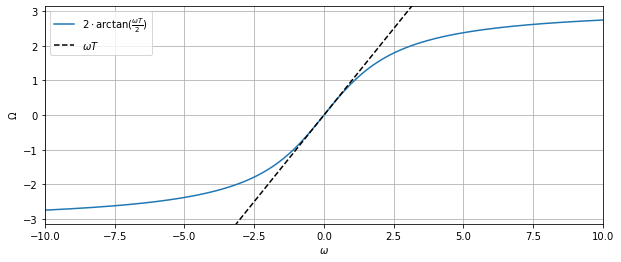

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

om = np.linspace(-10, 10, 200)
# Omega is calculated for T=1
Om = 2*np.arctan(om*1/2)

#Plot continous and discrete frequency
plt.figure(figsize=(10, 4))
plt.plot(om, Om, label=r'$2 \cdot \arctan(\frac{\omega T}{2})$')
plt.plot(om, om, 'k--', label=r'$\omega T$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\Omega$')
plt.axis([-10, 10, -np.pi, np.pi])
plt.legend(loc=2)
plt.grid()

Digital Realization of an Analog System

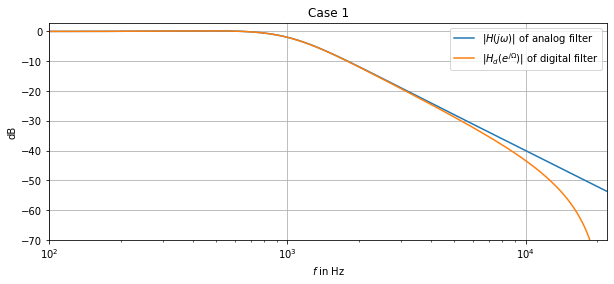

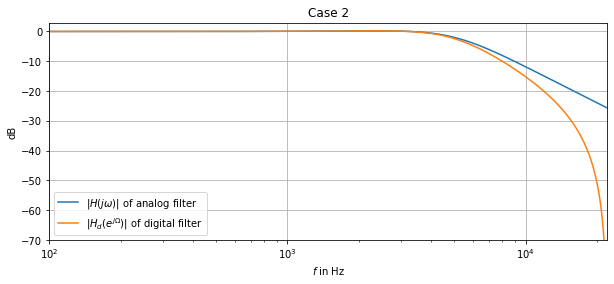

In [18]:
import scipy.signal as sig


fs = 44100  # sampling frequency
fcs = [1000 , 5000]; # corner frequencies of the lowpass
for x in range(0, 2):
    fc = fcs[x]  # corner frequency of the lowpass

# coefficients of analog lowpass filter
    Qinf = 0.8
    sinf = 2*np.pi*fc
    C = 1e-6
    L = 1/(sinf**2*C)
    R = sinf*L/Qinf

    B = [0, 0, 1]
    A = [L*C, R*C, 1]

# cofficients of digital filter
    T = 1/fs
    b = [T**2, 2*T**2, T**2]
    a = [(4*L*C+2*T*R*C+T**2), (-8*L*C+2*T**2), (4*L*C-2*T*R*C+T**2)]

# compute frequency responses
    Om, Hd = sig.freqz(b, a, worN=1024)
    tmp, H = sig.freqs(B, A, worN=fs*Om)

# plot results
    f = Om*fs/(2*np.pi)
    plt.figure(figsize=(10, 4))
    plt.semilogx(f, 20*np.log10(np.abs(H)), label=r'$|H(j \omega)|$ of analog filter')
    plt.semilogx(f, 20*np.log10(np.abs(Hd)), label=r'$|H_d(e^{j \Omega})|$ of digital filter')
    plt.title('Case %i' %(x+1))
    plt.xlabel(r'$f$ in Hz')
    plt.ylabel(r'dB')
    plt.axis([100, fs/2, -70, 3])
    plt.legend()
    plt.grid()

Design of Digital Filter from Butterworth Filter

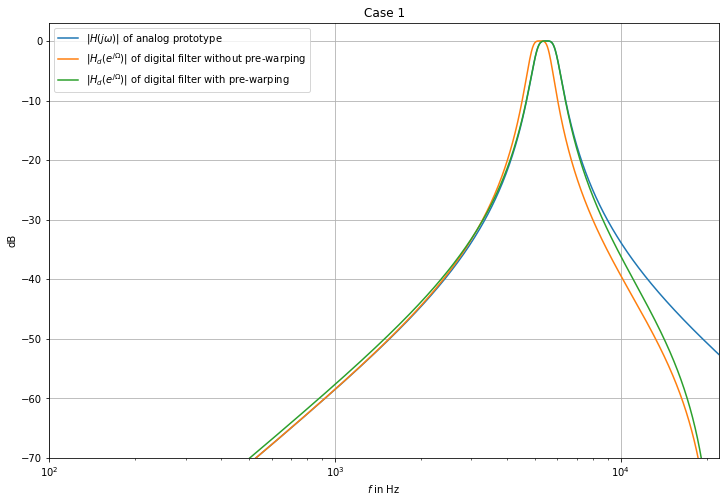

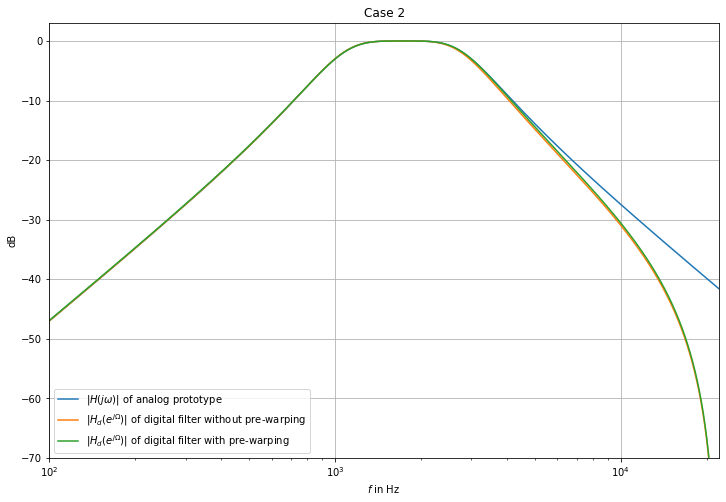

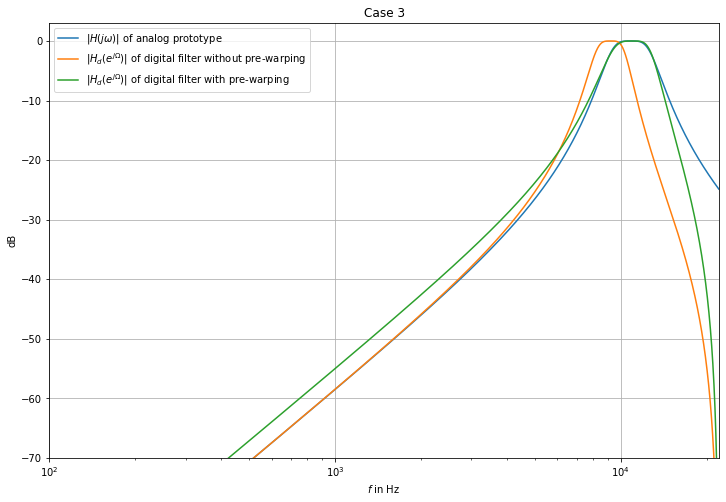

In [17]:
#Considering three cases for cut-off frequencies

fc1 = [5000, 1000, 9000]
fc2 = [6000, 3000, 13000]

for x in range(0, 3):
    omc = 2*np.pi*np.array([fc1[x], fc2[x]])  # corner frequencies of bandpass
    N = 2  # order of filter

    # pre-warping of corner frequencies
    omcp = 2*fs*np.tan(omc/(2*fs))

# design of analog filters with and without pre-warping
    B, A = sig.butter(N, omc, btype='bandpass', analog=True)
    Bp, Ap = sig.butter(N, omcp, btype='bandpass', analog=True)

# bilinear transform of analog prototypes
    b, a = sig.bilinear(B, A, fs)
    bp, ap = sig.bilinear(Bp, Ap, fs)

# compute frequency responses
    Om, Hdp = sig.freqz(bp, ap, worN=1024)
    Om, Hd = sig.freqz(b, a, worN=1024)
    tmp, H = sig.freqs(B, A, worN=fs*Om)

# plot the results of analog prototype, digital filter without pre-warping and with pre-warping
    np.seterr(divide='ignore')
    f = Om*fs/(2*np.pi)
    plt.figure(figsize=(12, 8))
    plt.semilogx(f, 20*np.log10(np.abs(H)),label=r'$|H(j \omega)|$ of analog prototype')
    plt.semilogx(f, 20*np.log10(np.abs(Hd)),label=r'$|H_d(e^{j \Omega})|$ of digital filter without pre-warping')
    plt.semilogx(f, 20*np.log10(np.abs(Hdp)),label=r'$|H_d(e^{j \Omega})|$ of digital filter with pre-warping')
    plt.title('Case %i' %(x+1))
    plt.xlabel(r'$f$ in Hz')
    plt.ylabel(r'dB')
    plt.axis([100, fs/2, -70, 3])
    plt.legend()
    plt.grid()